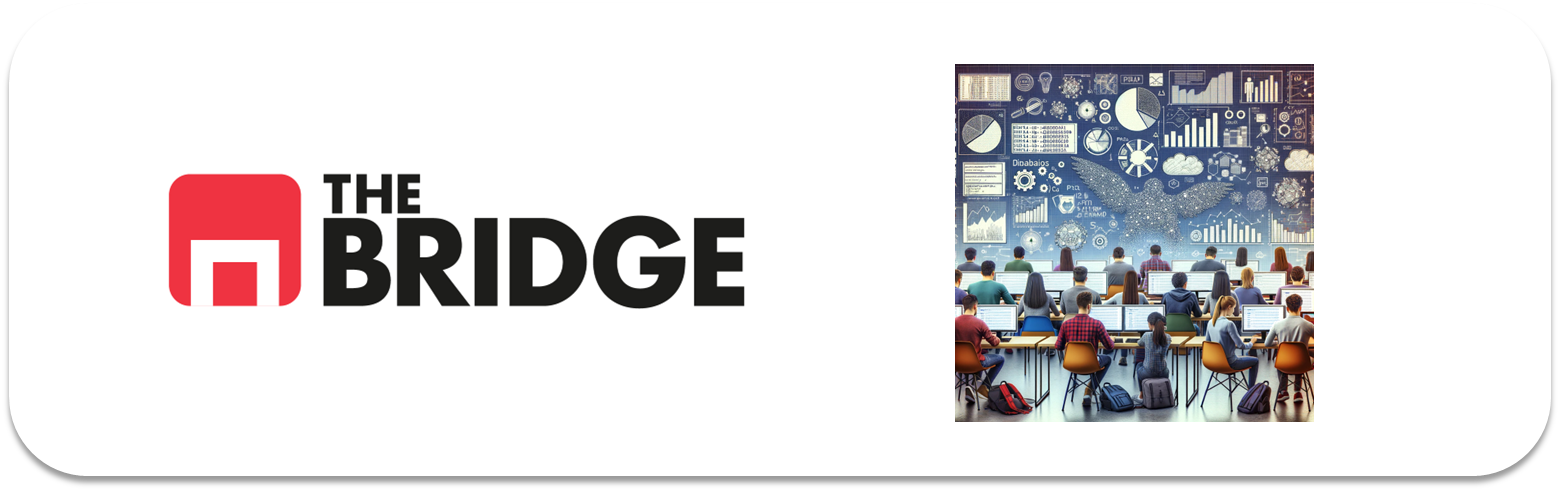

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
df_casas = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv",sep="|")
df_casas.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
df_casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
df_casas.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


<Axes: xlabel='MEDV', ylabel='Count'>

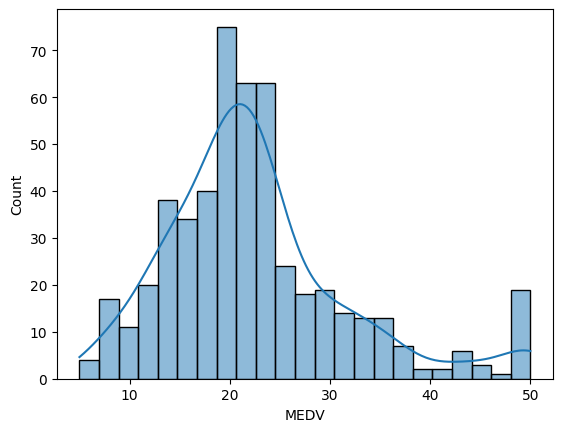

In [5]:
sns.histplot(df_casas["MEDV"],kde=True)

In [6]:
train_set,test_set = train_test_split(df_casas,test_size=0.2,random_state=42)

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 477 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  LSTAT    404 non-null    float64
 12  MEDV     404 non-null    float64
dtypes: float64(13)
memory usage: 44.2 KB


In [8]:
X_train = train_set.drop(columns="MEDV")
y_train = train_set["MEDV"]

X_test = test_set.drop(columns="MEDV")
y_test = test_set["MEDV"]

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 12)
(404,)
(102, 12)
(102,)


In [10]:
train_set.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.198855,0.400198,-0.044589,0.396406,-0.200303,0.334090,-0.366487,0.615947,0.576894,0.288970,0.414142,-0.380091
ZN,-0.198855,1.000000,-0.533489,-0.043754,-0.526414,0.274661,-0.575078,0.681817,-0.313790,-0.294267,-0.389163,-0.396572,0.309504
INDUS,0.400198,-0.533489,1.000000,0.095158,0.770957,-0.398690,0.636569,-0.707566,0.588952,0.702353,0.348303,0.603644,-0.470546
CHAS,-0.044589,-0.043754,0.095158,1.000000,0.135476,0.111272,0.096016,-0.121671,0.028685,0.007746,-0.113003,-0.070652,0.190642
NOX,0.396406,-0.526414,0.770957,0.135476,1.000000,-0.299615,0.720417,-0.772330,0.589061,0.650247,0.161253,0.593862,-0.415768
RM,-0.200303,0.274661,-0.398690,0.111272,-0.299615,1.000000,-0.210863,0.198299,-0.199738,-0.281127,-0.342643,-0.612577,0.710680
AGE,0.334090,-0.575078,0.636569,0.096016,0.720417,-0.210863,1.000000,-0.756589,0.430321,0.471670,0.240841,0.571051,-0.340216
DIS,-0.366487,0.681817,-0.707566,-0.121671,-0.772330,0.198299,-0.756589,1.000000,-0.483329,-0.523577,-0.217588,-0.494921,0.235114
RAD,0.615947,-0.313790,0.588952,0.028685,0.589061,-0.199738,0.430321,-0.483329,1.000000,0.912527,0.472257,0.480301,-0.387467
TAX,0.576894,-0.294267,0.702353,0.007746,0.650247,-0.281127,0.471670,-0.523577,0.912527,1.000000,0.444836,0.530632,-0.459795


<Axes: >

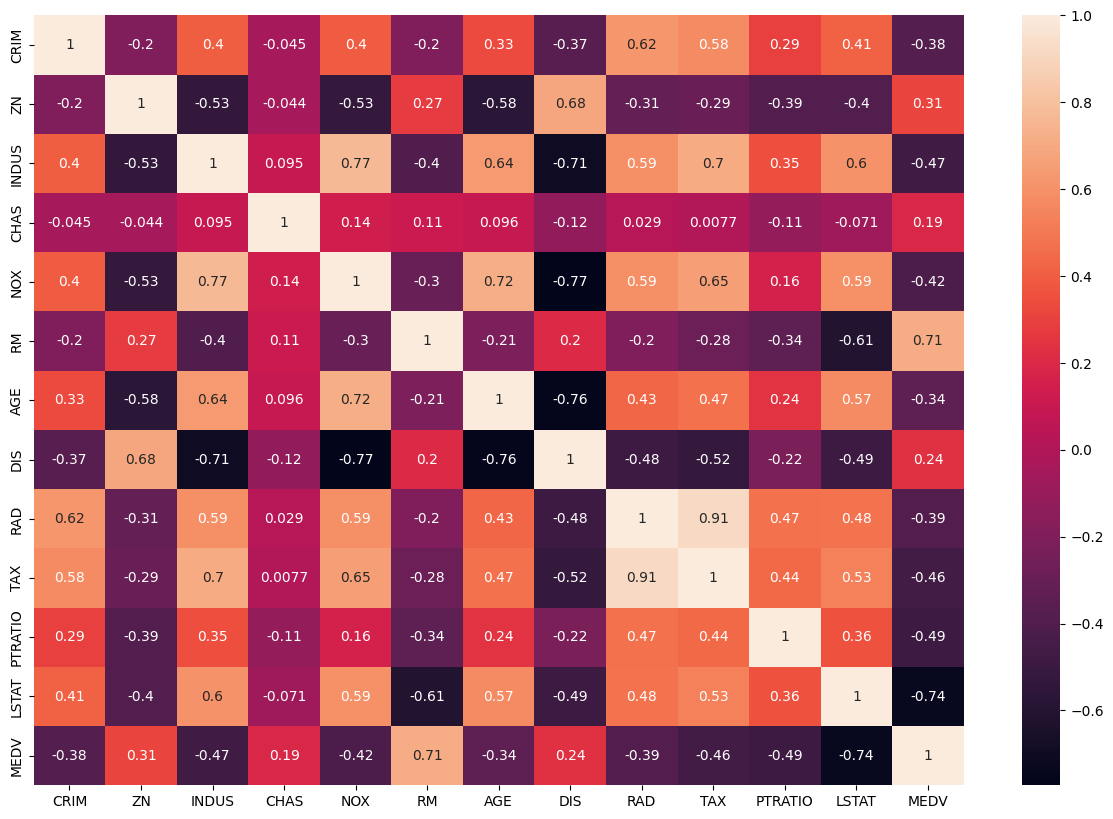

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(train_set.corr(),annot=True)

<Axes: xlabel='AGE', ylabel='Count'>

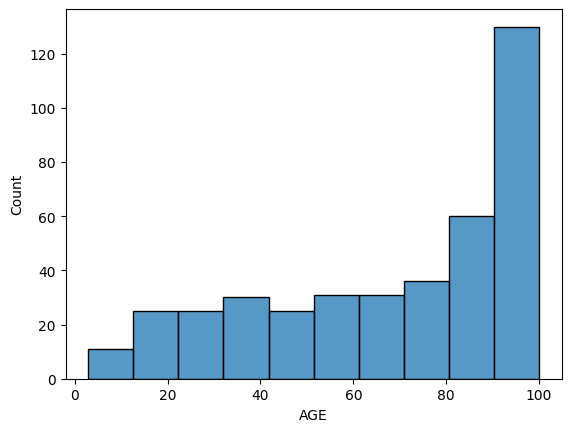

In [12]:
sns.histplot(x="AGE",data=train_set)

In [13]:
def histogramas(df,columnas):
    for i in columnas:
        sns.histplot(x=i,data=df)
        plt.show()

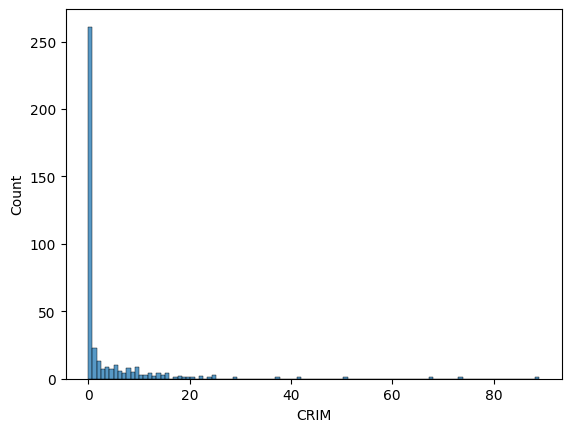

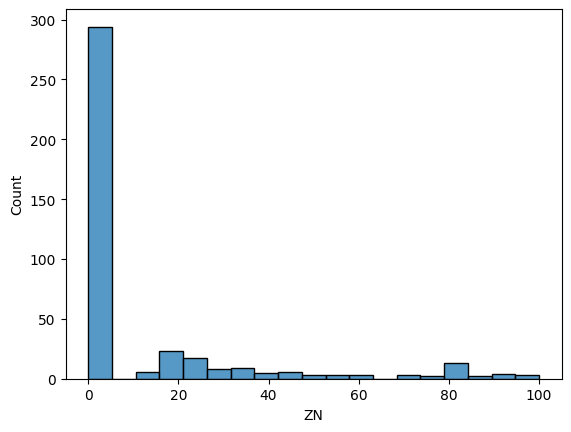

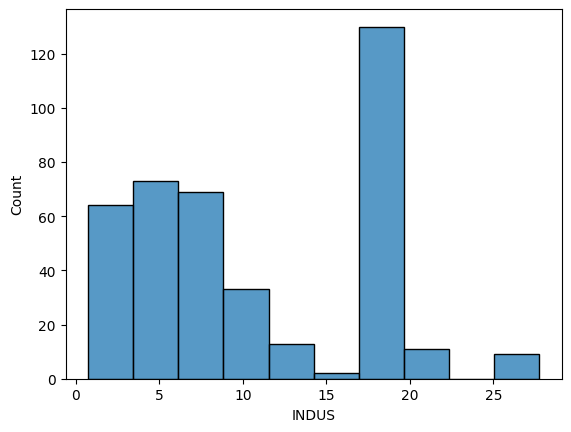

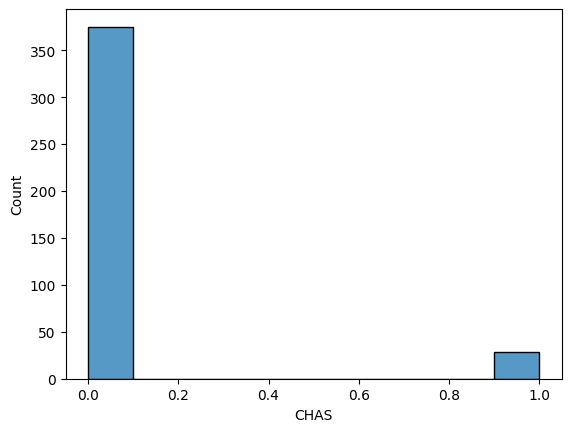

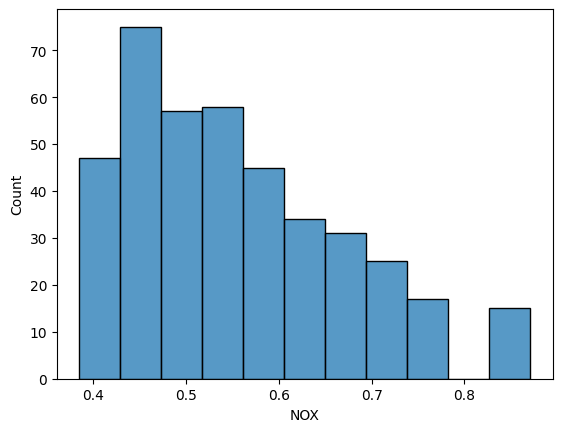

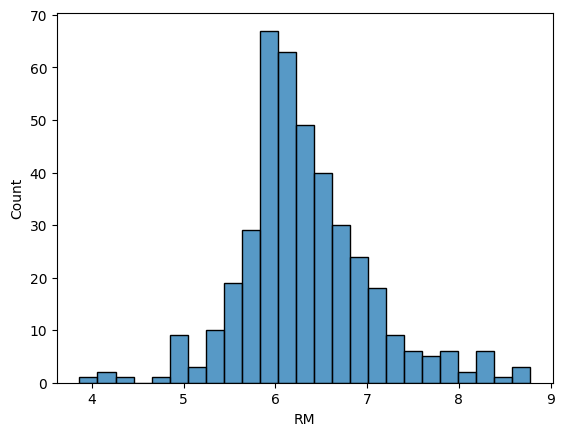

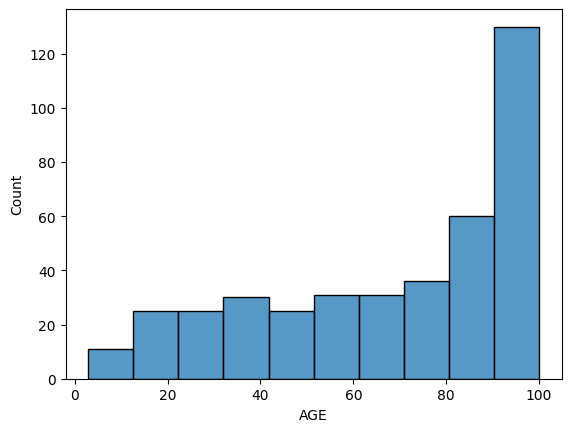

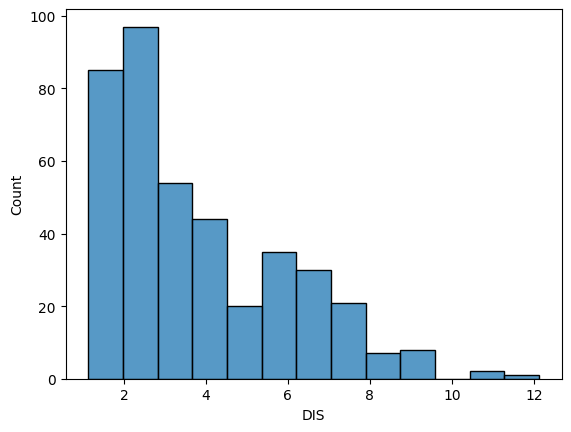

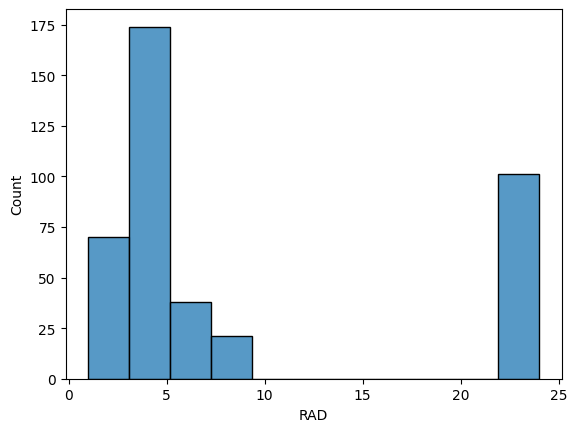

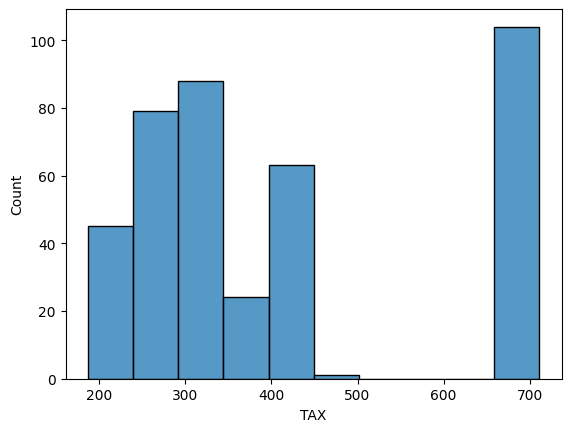

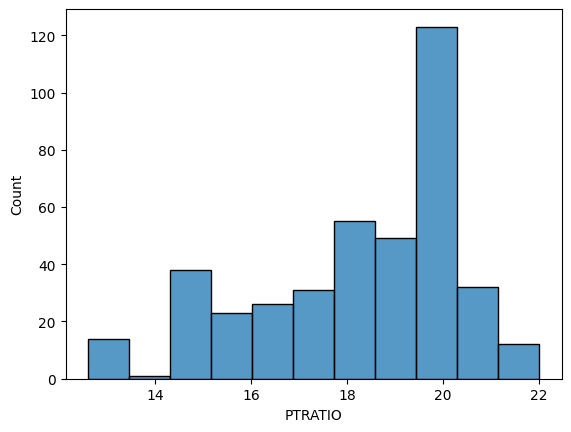

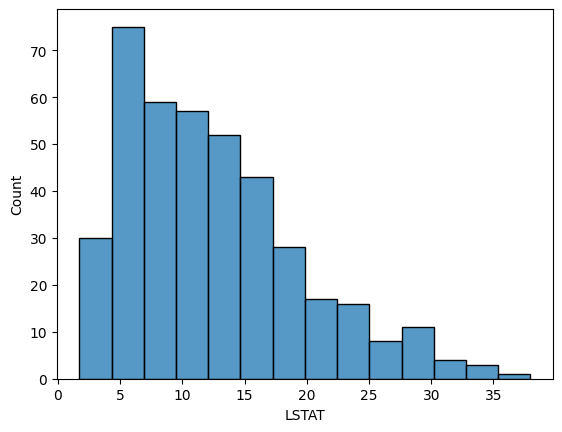

In [14]:
histogramas(train_set,X_train.columns)

In [15]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,1.522570


In [16]:
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,-0.481210
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,-1.257094
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.790338
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,-0.976875
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.677687
...,...,...,...,...,...,...,...,...,...,...,...,...
97,1.715000,-0.500320,1.033237,-0.278089,0.344643,-2.382098,1.124581,-1.059057,1.706891,1.578434,0.845343,3.085604
98,1.219719,-0.500320,1.033237,-0.278089,1.561057,0.204790,0.884955,-0.848260,1.706891,1.578434,0.845343,0.787522
99,1.177967,-0.500320,1.033237,-0.278089,0.344643,0.481403,1.124581,-1.071460,1.706891,1.578434,0.845343,1.233902
100,-0.401311,-0.500320,-0.943214,-0.278089,-0.914302,-0.424644,-0.838921,0.290806,-0.740922,-0.946166,0.081621,0.056698


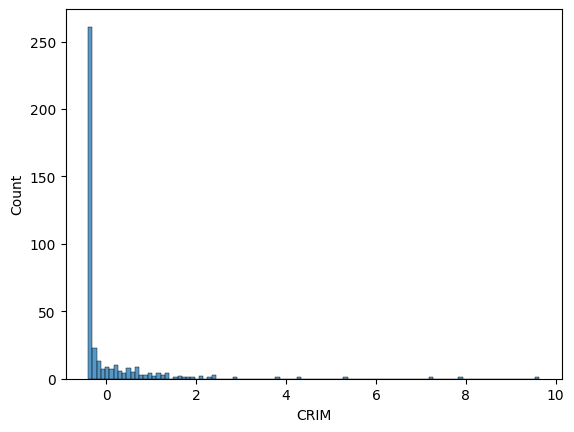

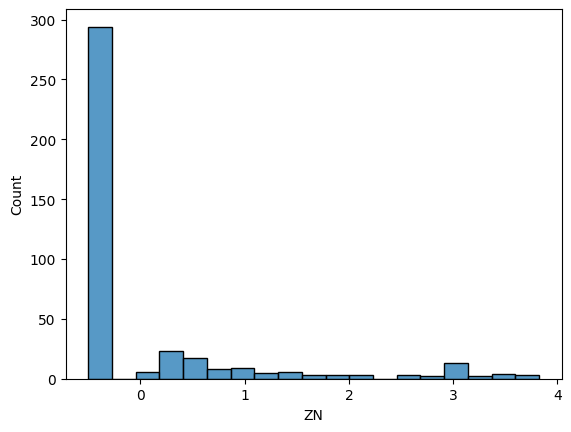

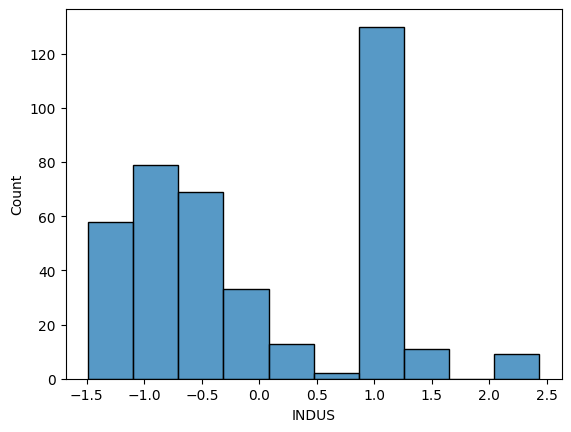

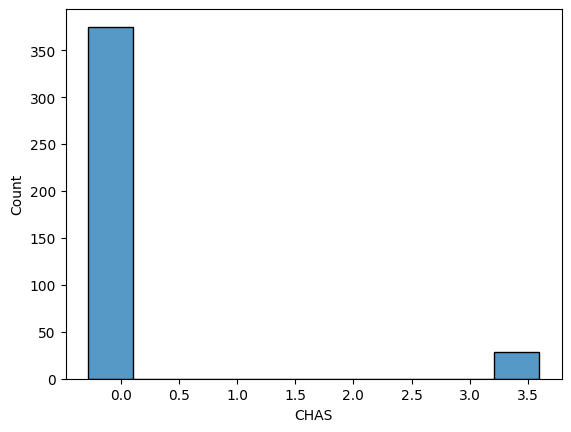

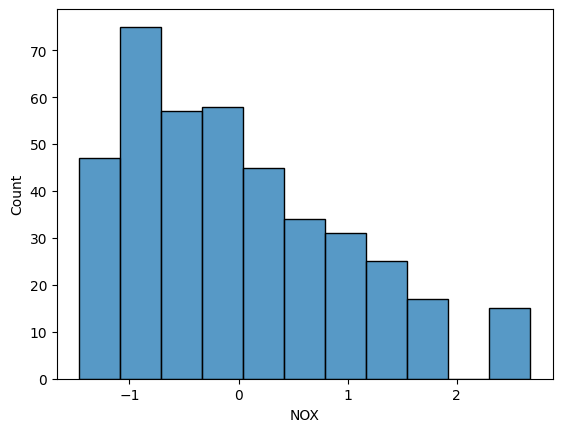

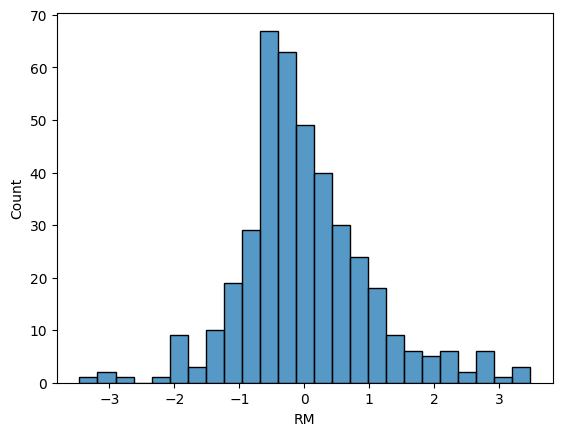

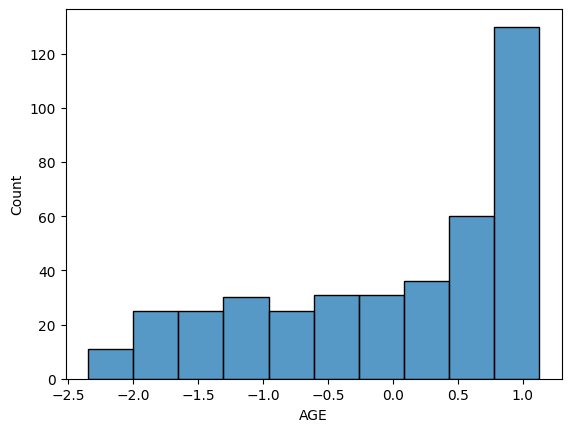

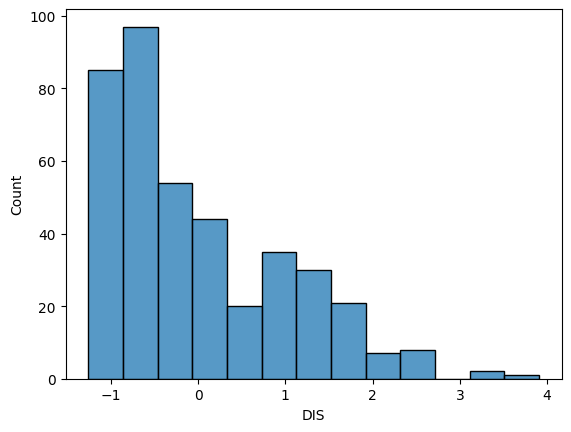

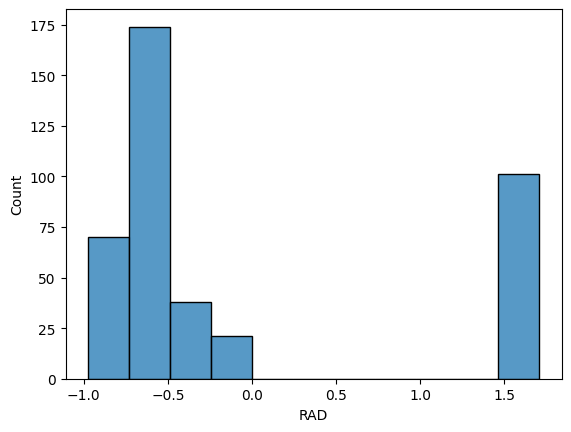

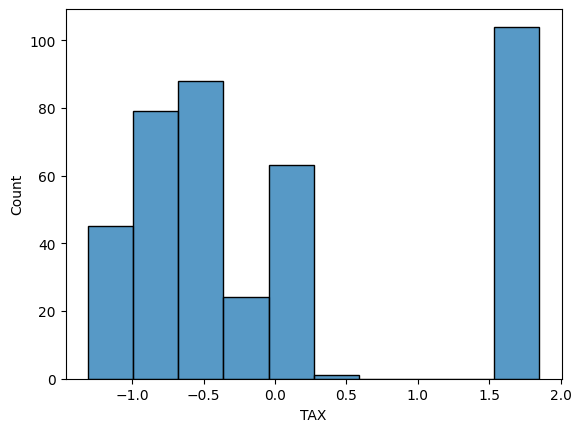

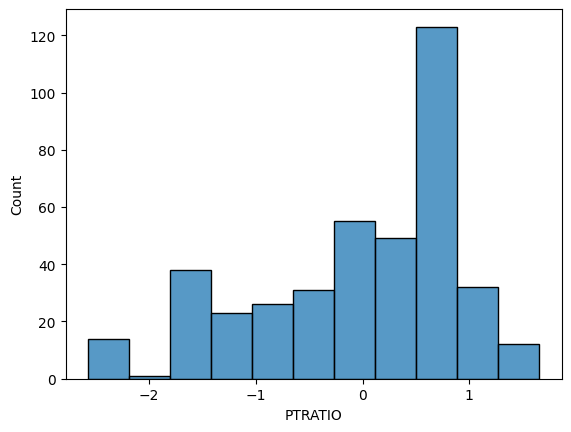

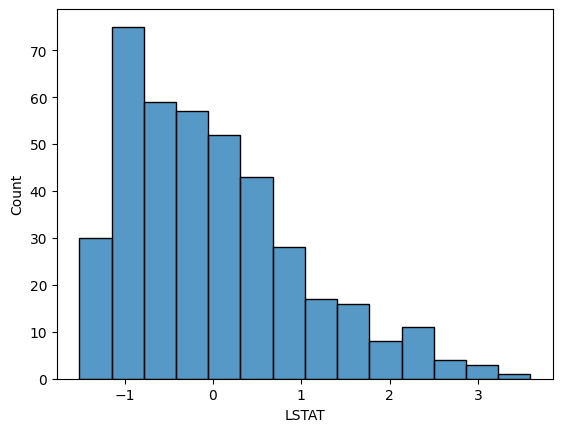

In [17]:
histogramas(X_train,X_train.columns)

<div style="color:pink">La variable CHAS lo quitamos de los features ya que no tiene tanta correlacion con nuestra target y ademas tiene una distribucion que nos incomoda.
DIS tampoco me parece muy relevante porque solo tiene una correlacion de 0.24, que no me parece exageradamente alta como para tenerla en cuenta</div>

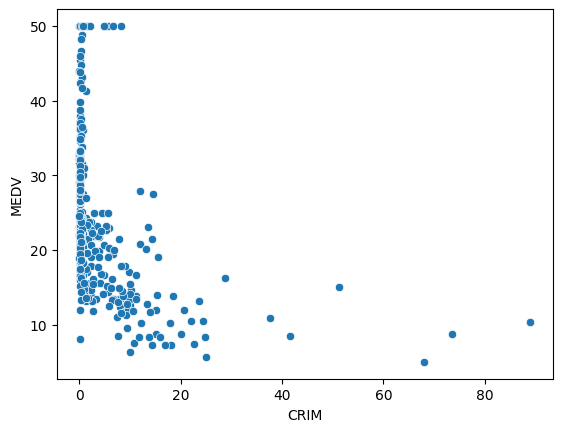

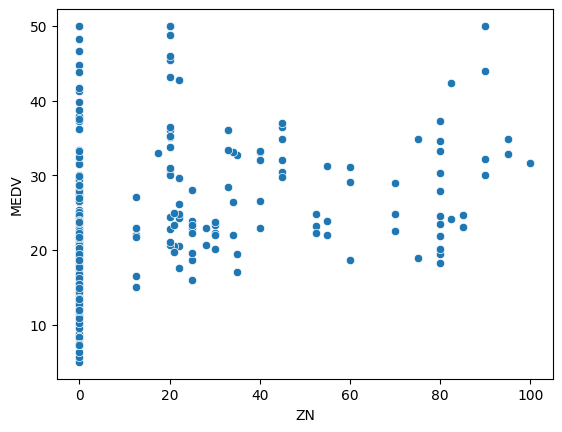

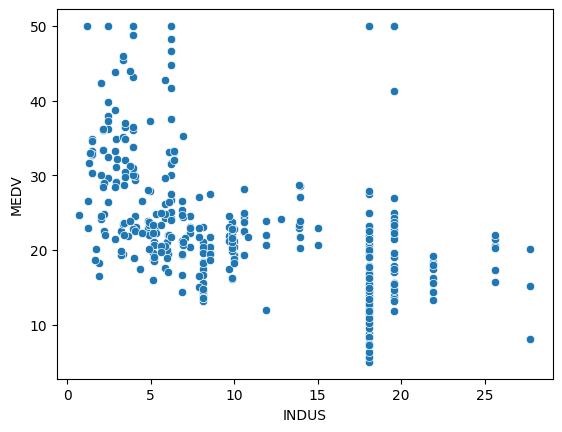

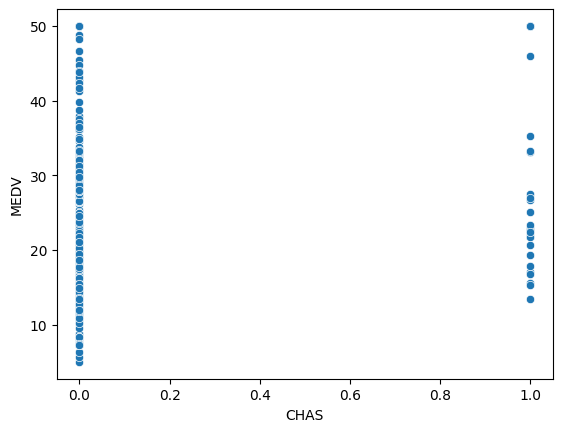

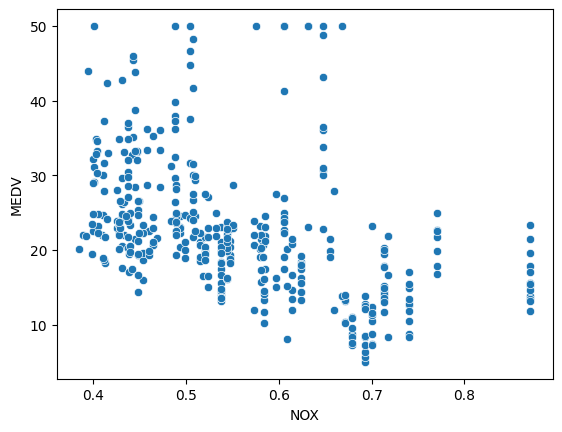

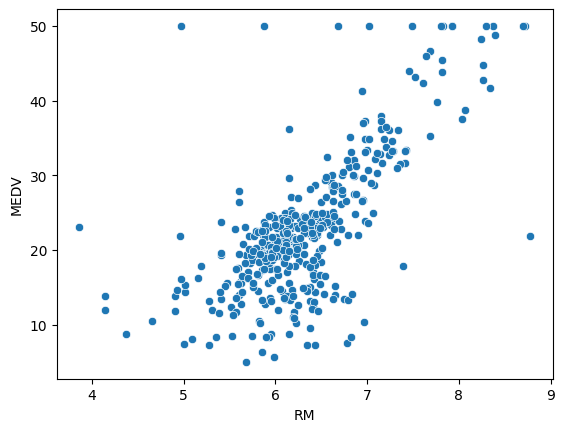

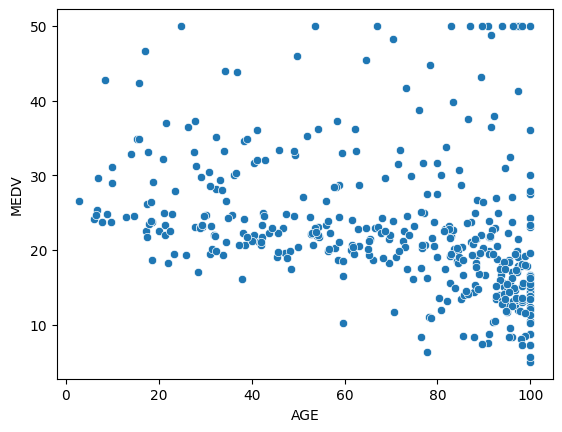

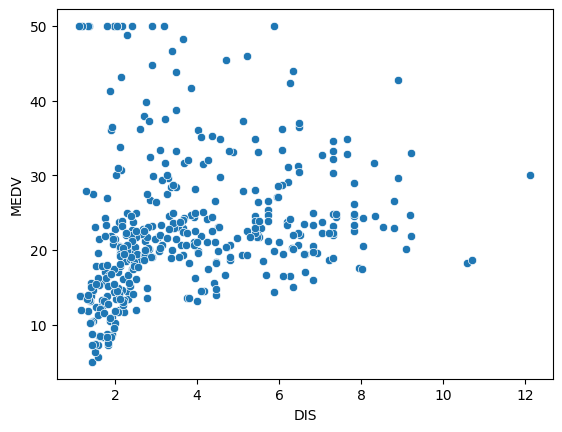

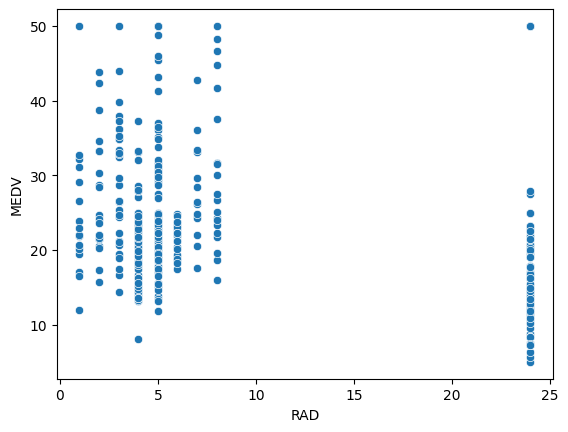

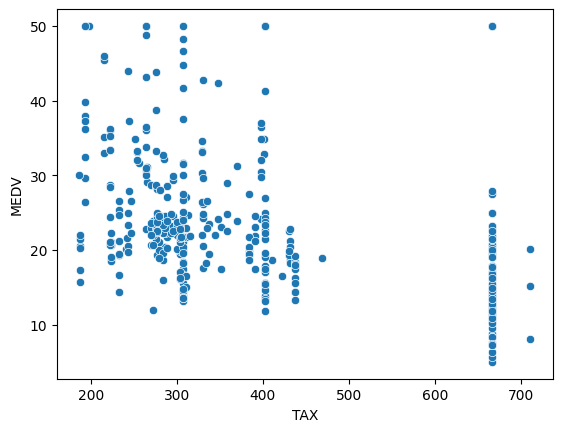

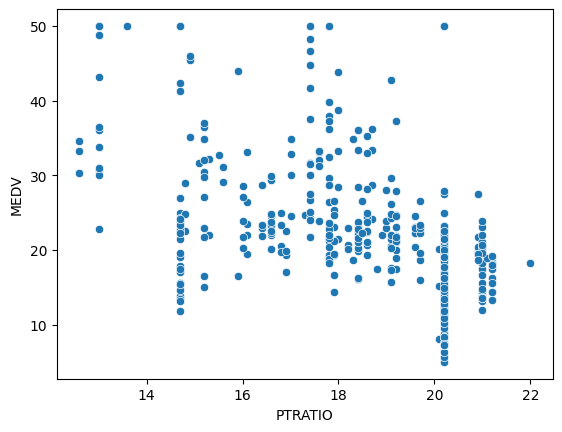

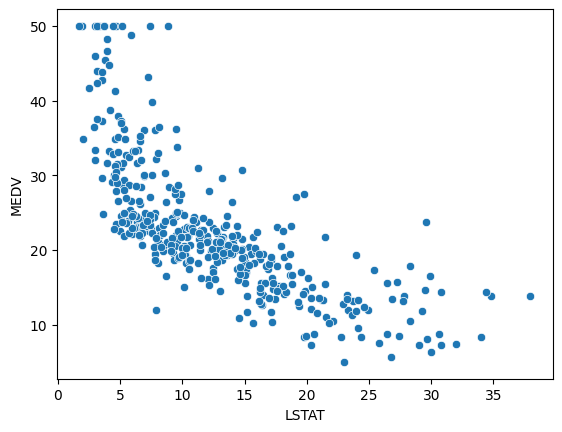

In [18]:
for i in X_train.columns:
    sns.scatterplot(x=i,y="MEDV",data=train_set)
    plt.show()

In [22]:
features = X_train.columns.to_list()
features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

In [23]:
features.remove("CHAS")

In [24]:
features.remove("CRIM")
features.remove("DIS")

In [25]:
lm = LinearRegression()
lm.fit(X_train[features],y_train)

LinearRegression()

In [26]:
lm.intercept_

np.float64(22.796534653465343)

In [27]:
lm.coef_

array([-0.31972529,  0.85742377, -1.06999193,  3.33034168,  0.72341934,
        1.60690242, -1.93797869, -2.2542363 , -4.17740001])

In [30]:
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_, index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef

,coefs
ZN,-0.319725
INDUS,0.857424
NOX,-1.069992
RM,3.330342
AGE,0.723419
RAD,1.606902
TAX,-1.937979
PTRATIO,-2.254236
LSTAT,-4.177400


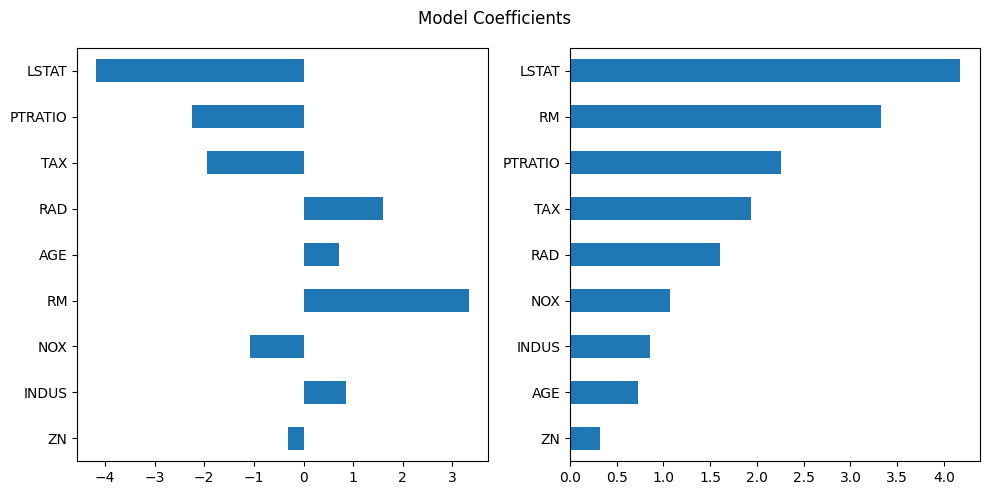

In [31]:
show_coefs(lm)

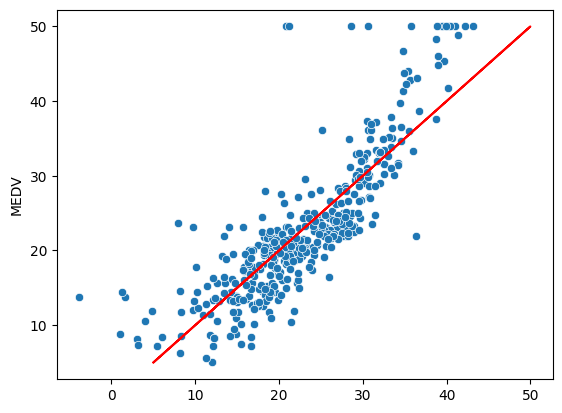

In [36]:
predictions_train = lm.predict(X_train[features])
sns.scatterplot(x=predictions_train,y=y_train)
plt.plot(y_train,y_train,"-r")

In [32]:
predictions = lm.predict(X_test[features])

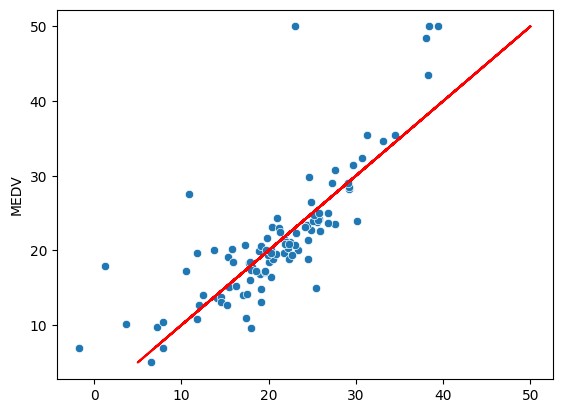

In [34]:
sns.scatterplot(x=predictions,y=y_test)
plt.plot(y_test,y_test,"-r")

In [37]:
print("MAE train",mean_absolute_error(y_train,predictions_train))
print("MSE train",mean_squared_error(y_train,predictions_train))
print("RMSE train", np.sqrt(mean_squared_error(y_train,predictions_train)))
print("R2 train: ",lm.score(X_train[features],y_train))

print("*"*50)
print("MAE",mean_absolute_error(y_test,predictions))
print("MSE",mean_squared_error(y_test,predictions))
print("RMSE", np.sqrt(mean_squared_error(y_test,predictions)))
print("R2: ",lm.score(X_test[features],y_test))

MAE train 3.657383992491944
MSE train 26.147633739802657
RMSE train 5.1134757005194285
R2 train:  0.6990145132326113
**************************************************
MAE 3.2173413989408095
MSE 25.899656135650158
RMSE 5.08917047618275
R2:  0.6468250372542748


In [38]:
ridge_r = Ridge(alpha=1)
ridge_r.fit(X_train[features],y_train)
predictions_ridge = ridge_r.predict(X_train[features])
predictions_ridge_test = ridge_r.predict(X_test[features])

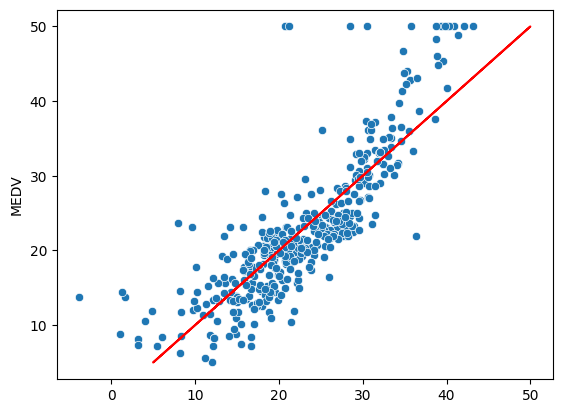

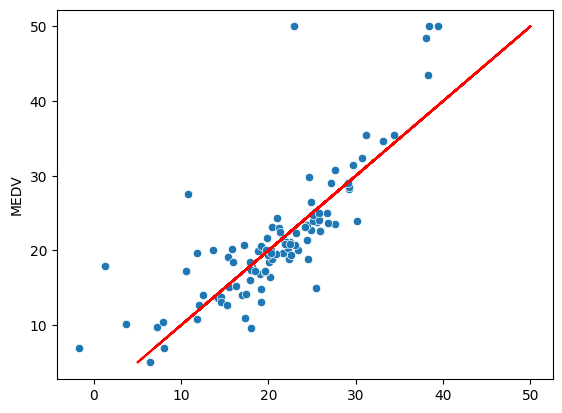

In [39]:
for i in [[predictions_ridge,y_train],[predictions_ridge_test,y_test]]:
    sns.scatterplot(x=i[0],y=i[1])
    plt.plot(i[1],i[1],"-r")
    plt.show()

In [40]:
print("MAE train",mean_absolute_error(y_train,predictions_ridge))
print("MSE train",mean_squared_error(y_train,predictions_ridge))
print("RMSE train", np.sqrt(mean_squared_error(y_train,predictions_ridge)))
print("R2 train: ",lm.score(X_train[features],y_train))

print("*"*50)
print("MAE",mean_absolute_error(y_test,predictions_ridge_test))
print("MSE",mean_squared_error(y_test,predictions_ridge_test))
print("RMSE", np.sqrt(mean_squared_error(y_test,predictions_ridge_test)))
print("R2: ",lm.score(X_test[features],y_test))

MAE train 3.6544841988328196
MSE train 26.148525172446174
RMSE train 5.113562864818049
R2 train:  0.6990145132326113
**************************************************
MAE 3.2196236695414466
MSE 25.943661786037527
RMSE 5.093492101303145
R2:  0.6468250372542748


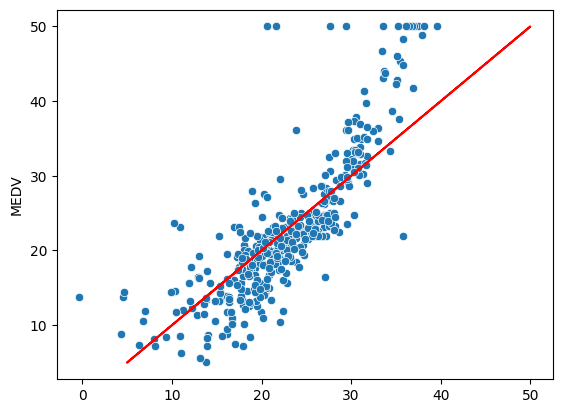

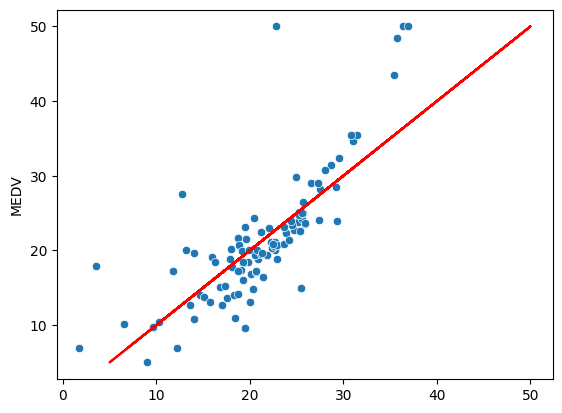

In [41]:
lasso_l = Lasso(alpha=1)
lasso_l.fit(X_train[features],y_train)
predictions_lasso = lasso_l.predict(X_train[features])
predictions_lasso_test = lasso_l.predict(X_test[features])
for i in [[predictions_lasso,y_train],[predictions_lasso_test,y_test]]:
    sns.scatterplot(x=i[0],y=i[1])
    plt.plot(i[1],i[1],"-r")
    plt.show()

In [42]:
print("MAE train",mean_absolute_error(y_train,predictions_lasso))
print("MSE train",mean_squared_error(y_train,predictions_lasso))
print("RMSE train", np.sqrt(mean_squared_error(y_train,predictions_lasso)))
print("R2 train: ",lm.score(X_train[features],y_train))

print("*"*50)
print("MAE",mean_absolute_error(y_test,predictions_lasso_test))
print("MSE",mean_squared_error(y_test,predictions_lasso_test))
print("RMSE", np.sqrt(mean_squared_error(y_test,predictions_lasso_test)))
print("R2: ",lm.score(X_test[features],y_test))

MAE train 3.759402753253213
MSE train 28.854773701511533
RMSE train 5.371663960218615
R2 train:  0.6990145132326113
**************************************************
MAE 3.4608087954138207
MSE 27.324286068025184
RMSE 5.22726372665711
R2:  0.6468250372542748


### <div style="color:pink"> Me quedaría con el modelo inicial , sin añadir hiperparámetros ni nada, ya que vemos que no hay diferencia grande entre RMSE de train y  test por lo  que no hay overfitting </div>